<a href="https://colab.research.google.com/github/fazamina/Data-Mining-and-Business-Intelligence-Case-Study/blob/main/EDA_(Case_Study_1_Data_Mining).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis**



In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

# Jakarta

In [ ]:
dfJ.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ.drop(dfJ.iloc[:,14:], axis=1, inplace=True)
dfJ.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [ ]:
dfJ1 = dfJ.iloc[:121,:]
dfJ1.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
111,25-11-2021,86.0,45.0,2.0,1.0,1.0,1.0,Jakarta Timur,SHM,1300.0,NaN,6.900000e+08,https://www.rumah123.com/properti/jakarta-timu...,Rumah Cluster 1 lantai. 10 menit ke stasiun LR...
112,24-11-2021,96.0,69.0,3.0,3.0,NaN,NaN,Jakarta Timur,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/jakarta-timu...,"Rumah Minimalis Modern 2 lantai, semi furnishe..."
113,22-11-2021,67.0,134.0,3.0,2.0,NaN,1.0,Jakarta Timur,SHM + IMB,2200.0,NaN,1.150000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah baru 2 lantai strategis di Kp Tengah Kra...
114,02-12-2021,122.0,160.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,2.465000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah full furnished, fasilitas : water toren,..."
115,06-12-2021,90.0,90.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,1.398000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 2 Lantai Legalitas Pecah Perkavling, Fas..."
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,06-12-2021,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,Timur,2.250000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [ ]:
bagus = dfJ1.drop_duplicates(subset='URL', keep="first")
bagus
#pengecekan apakah ada data duplikat apa tidak

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [ ]:
dfJ2 = dfJ1.drop(['created_at', 'deskripsi', 'URL'], axis=1)
dfJ2
#drop variabel yang kira-kira tidak penting

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09
1,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09
2,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08
3,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08
4,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09
...,...,...,...,...,...,...,...,...,...,...,...
116,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09
117,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08
118,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09
119,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09


In [ ]:
hargaJakarta = dfJ2['harga']
N, P = dfJ2.shape

harga = []
for i in range(N):
  harga.append('Jakarta')

dfJ2['Category'] = harga
dfJ2.tail()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,Category
116,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,Jakarta
117,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,Jakarta
118,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,Jakarta
119,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,Jakarta
120,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,Timur,2.250000e+09,Jakarta


# Bogor

In [ ]:
dfB.head(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06-12-2021,120.0,70.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06-12-2021,125.0,125.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,06-12-2021,97.0,72.0,3.0,2.0,0.0,1.0,Cibinong,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,06-12-2021,72.0,33.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,60.0,30.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Menghapus kolom NaN
dfB.drop(dfB.iloc[:,14:], axis=1, inplace=True)
dfB.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [ ]:
#drop data yang kosong
dfB1 = dfB.iloc[:193,:]
dfB1.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
183,03-12-2021,120.0,70.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.500000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dekat LRT Babakan Madang (bisa jalan kaki), 5 ..."
184,03-12-2021,84.0,36.0,2.0,1.0,0.0,2.0,Tajurhalang,SHM,1300.0,NaN,3.902000e+08,https://www.rumah.com/listing-properti/dijual-...,"One Gate System, Free taman depan, Playground"
185,03-12-2021,100.0,72.0,3.0,2.0,0.0,2.0,Gunung Putri,SHM,2200.0,NaN,1.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Pusat pendidikan, Gate toll Kota wisata cibubur"
186,03-12-2021,72.0,36.0,2.0,1.0,0.0,1.0,Bojonggede,SHGB,1300.0,NaN,4.000000e+08,https://www.rumah.com/listing-properti/dijual-...,"5 menit ke stasiun Bojong Gede, 10 menit dari ..."
187,03-12-2021,72.0,36.0,2.0,1.0,0.0,1.0,Parung,SHM,1300.0,NaN,4.195300e+08,https://www.rumah.com/listing-properti/dijual-...,"Taman, Children Playground"
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"
192,03-12-2021,72.0,90.0,3.0,2.0,1.0,1.0,Cibinong,SHM,2200.0,NaN,9.000000e+08,https://www.rumah.com/listing-properti/dijual-...,"Nyaman, aman, swimming pool"


In [ ]:
#Melihat data duplicate
print(dfB1.shape)
dfB1.duplicated().sum()

(193, 14)


0

In [ ]:
#Mengubah data float menjadi category
dfB1['lokasi'] = dfB1['lokasi'].astype('category')
dfB1['sertifikat'] = dfB1['sertifikat'].astype('category')
dfB1['hadap'] = dfB1['hadap'].astype('category')
dfB1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  193 non-null    object  
 1   LT          193 non-null    float64 
 2   LB          193 non-null    float64 
 3   KT          193 non-null    float64 
 4   KM          193 non-null    float64 
 5   garasi      193 non-null    float64 
 6   carport     193 non-null    float64 
 7   lokasi      193 non-null    category
 8   sertifikat  193 non-null    category
 9   listrik     193 non-null    float64 
 10  hadap       19 non-null     category
 11  harga       193 non-null    float64 
 12  URL         193 non-null    object  
 13  deskripsi   193 non-null    object  
dtypes: category(3), float64(8), object(3)
memory usage: 19.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Membuat kolom category untuk lokasi
hargaDepok= dfB1['harga']
N, P = dfB1.shape

harga = []
for i in range(N):
  harga.append('Bogor')

dfB1['Category'] = harga
dfB1.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Category
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit",Bogor
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni,Bogor
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota,Bogor
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar",Bogor
192,03-12-2021,72.0,90.0,3.0,2.0,1.0,1.0,Cibinong,SHM,2200.0,NaN,9.000000e+08,https://www.rumah.com/listing-properti/dijual-...,"Nyaman, aman, swimming pool",Bogor


In [ ]:
#Menghapus kolom yang kira-kira tidak penting
dfB2 = dfB1.drop(['created_at', 'deskripsi', 'URL'], axis=1)
dfB2

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,Category
0,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,Bogor
1,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,Bogor
2,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,Bogor
3,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,Bogor
4,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...
188,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,Bogor
189,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,Bogor
190,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,Bogor
191,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,Bogor


# Tangerang

In [ ]:
dfT.head()
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfT.drop(dfT.iloc[:,14:], axis=1, inplace=True)
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [ ]:
dfT = dfT.iloc[:124,:]
dfT.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
114,12-08-2021,276.0,441.0,4.0,4.0,4.0,4.0,"BSD, TANGERANG",SHM,11000.0,NaN,13000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...
115,12-08-2021,66.0,37.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,221.0,https://www.rumah123.com/properti/tangerang/ho...,5 juta sudah berkesempatan dapat rumah murah y...
116,12-08-2021,118.0,88.0,3.0,2.0,NaN,NaN,"GADING SERPONG, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,2300.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang HOEK, CLUSTER , TERMASU..."
117,12-08-2021,144.0,240.0,4.0,2.0,NaN,1.0,"GADING SERPONG, TANGERANG",SHM,2200.0,Selatan,2800.0,https://www.rumah123.com/properti/tangerang/ho...,"Bisa Nego, Full furnished, Lokasi strategis, F..."
118,12-08-2021,300.0,148.0,4.0,3.0,2.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,Timur,1900.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL DI BAWAH HARGA PASAR, HARGA PASARAN MAS..."
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
dfT.duplicated().sum()

0

In [ ]:
df = np.abs(dfT.harga - dfT.harga.mean())<=(2*dfT.harga.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()
dfT2 = dfT[df] # Data tanpa outliers
print(dfT2.shape, dfT.shape)

(124,)
(123, 14) (124, 14)


In [ ]:
hargaTangerang= dfT2['harga']
N, P = dfT2.shape

harga = []
for i in range(N):
  harga.append('Tangerang')

dfT2['Category'] = harga
dfT2.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Category
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tangerang
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,Tangerang


# Bekasi

In [ ]:
dfX.drop(dfX.iloc[:,14:], axis=1, inplace=True)
dfX.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [ ]:
dfX1 = dfX.iloc[:107,:]
dfX1.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


In [ ]:
bagusbekasi = dfX1.drop_duplicates(subset='URL', keep="first")
bagusbekasi

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-12-2021,108.0,47.0,2.0,1.0,NaN,1.0,Kota Bekasi,SHM,1300.0,NaN,1.000000e+09,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah siap,di salah satu cluster grand wisata,..."
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."


In [ ]:
dfX2 = dfX1.drop(['created_at', 'deskripsi', 'URL'], axis=1)
dfX2

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08
1,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08
2,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08
3,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09
4,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09
...,...,...,...,...,...,...,...,...,...,...,...
102,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09
103,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08
104,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08
105,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08


In [ ]:
hargaBekasi = dfX2['harga']
N, P = dfX2.shape

harga = []
for i in range(N):
  harga.append('Bekasi')

dfX2['Category'] = harga
dfX2.tail()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,Category
102,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,Bekasi
103,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,Bekasi
104,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,Bekasi
105,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,Bekasi
106,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,Bekasi


In [ ]:
print(dfX1.shape)
dfX1.duplicated().sum()

(107, 14)


0

In [ ]:
dfX['lokasi'] = dfX['lokasi'].astype('category')
dfX['sertifikat'] = dfX['sertifikat'].astype('category')
dfX['hadap'] = dfX['hadap'].astype('category')
dfX.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
URL             object
deskripsi       object
dtype: object

#Depok#

In [ ]:
dfD.sample(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD1 = dfD.iloc[:118,:]
dfD1.tail(10)
#menghilangkan baris yang kosong

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
108,4-12-2021,66,56.0,3.0,2.0,NaN,1.0,Cimanggis,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,4-12-2021,94,56.0,3.0,2.0,NaN,1.0,Cimanggis,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,4-12-2021,120,103.0,3.0,2.0,NaN,2.0,Cimanggis,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,4-12-2021,65,46.0,2.0,2.0,NaN,1.0,Cimanggis,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,4-12-2021,80,80.0,2.0,2.0,NaN,NaN,Cilodong,SHM,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD1.drop(dfD1.iloc[:,14:], axis=1, inplace=True)
dfD1.columns
#menghilangkan kolom yang kosong

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [ ]:
dfD2= dfD1.drop_duplicates(subset='URL', keep="first")
#menghilangkan duplicates

In [ ]:
N, P = dfD2.shape

harga = []
for i in range(N):
  harga.append('Depok')

dfD2['Category'] = harga
#menambahkan kategori untuk visualisasi

# Kualitas data Milik Perusahaan


kualitas data milik perusahaan:
i) Kelengkapan data:
Kelengkapan suatu data mengacu kepada seberapa komprehensif informasi. Faktor terpenting kelengkapan adalah untuk memastikan semua data yang dibutuhkan tersedia. Namun berdasarkan hasil penyelidikan kami, data yang disediakan oleh RPPI  memiliki banyak missing value di masing-masing baris dan kolom dalam data. Hal tersebut menyulitkan tim kami dalam menganalisis data dan memerlukan banyak waktu untuk membersihkan dan merapikan data yang diberikan.

ii) Relevansi
Informasi yang didapatkan tentunya memiliki alasan bagus mengapa informasi tertentu dikumpulkan. Sayangnya, berdasarkan analisa tim kami, kami menemukan banyaknya data-data yang dikumpulkan dan tidak relevan dalam penarikan keputusan, seperti data deskripsi, URL, dan created_at

iii) Reabilitas
Informasi yang didapatkan harus sesuai dengan data yang didapatkan pada lapangan, karena data yang salah dapat berakibat fatal. Berdasarkan hasil penelitian tim kami, data yang didapatkan oleh perusahaan RPPI sudah reliabel dikarenakan tim kami tidak menemukan adanya duplikat didalam keseluruhan dataframe. Namun, tim kami menemukan banyaknya outlier dalam data yang diberikan.

Oleh karena itu, menurut analisa tim kami, kualitas data yang dimiliki perusahaan sudah cukup reliabel, namun memiliki beberapa variabel yang kurang relevan, dan data-data yang diberikan kurang lengkap.

# Saran Perbaikan kepada Perusahaan

Saran perbaikan data agar RPPI lebih unggul.
i. Missing values
Missing values dalam Big Data tidak jarang ditemukan, ada kasus dimana Missing values tidak bisa dihindari dan ada juga yang bisa dihindari. Sebagai contoh, untuk data garasi dan carport, apabila rumah tersebut tidak memiliki garasi/carport, sebaiknya diisi dengan angka 0. 

ii. Deskripsi
Pendeskripsian dari masing-masing rumah tidak bisa dijelaskan dalam format yang sama persis. Tetapi akan lebih baik jika diberikan instruksi dalam pengisian kolom deskripsi, agar dalam database terlihat seragam. Contohnya adalah dalam pengisian deskripsi ada instruksi seperti "Berikan penjelasan mengenai rumah secara berurut dari a ke b ke c"


In [ ]:
boxplot(category)

NameError: ignored

# Nomor 5

In [ ]:
dbb = np.abs(dfJ2.harga - dfJ2.harga.mean())<=(2*dfJ2.harga.std())
# mu-2s<x<mu+2s
print(dfJ.shape)
dbb.head()

dfJ3 = dfJ2[dbb] # Data tanpa outliers
print(dfJ3.shape, dfJ2.shape)

outlierJKT = np.abs(dfJ2.harga - dfJ2.harga.mean())<=(2*dfJ2.harga.std())
print(outlierJKT)




(1024, 14)
(115, 12) (121, 12)
0      True
1      True
2      True
3      True
4      True
       ... 
116    True
117    True
118    True
119    True
120    True
Name: harga, Length: 121, dtype: bool


In [ ]:
import statistics
set1 = dfJ3['KT']
print("Modus dari jumlah kamar tidur % s" % (statistics.mode(set1)))
set2 = dfJ3['KM']
print("Modus dari jumlah kamar mandi % s" % (statistics.mean(set2)))
set3 = dfJ3['garasi']
print("Modus dari jumlah garasi % s" % (statistics.mode(set3)))
set4 = dfJ3['carport']
print("Modus dari jumlah carport % s" % (statistics.mode(set4)))
set5 = dfJ3['LT']
print("Mean dari luas tanah % s" % (statistics.mean(set5)))
set6 = dfJ3['LB']
print("Mean dari luas bangunan % s" % (statistics.mean(set6)))
set7 = dfJ3['harga']
print("Mean dari harga % s" % (statistics.mean(set7)))
set8 = dfJ3['listrik']
print("Mode dari listrik % s" % (statistics.mode(set8)))

Modus dari jumlah kamar tidur 3.0
Modus dari jumlah kamar mandi 3.2956521739130435
Modus dari jumlah garasi 1.0
Modus dari jumlah carport 1.0
Mean dari luas tanah 223.0782608695652
Mean dari luas bangunan 240.9913043478261
Mean dari harga 6215656974.373913
Mode dari listrik 2200.0


In [ ]:
df = np.abs(data.harga - data.harga.mean())<=(2*data.harga.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()
data2 = data[df] # Data tanpa outliers
print(data2.shape, data.shape)

AttributeError: ignored

In [ ]:
set1 = dfT2['KT']
print("Modus dari jumlah kamar tidur % s" % (statistics.mode(set1)))
set2 = dfT2['KM']
print("Modus dari jumlah kamar mandi % s" % (statistics.mode(set2)))
set3 = dfT2['garasi']
print("Modus dari jumlah garasi % s" % (statistics.mode(set3)))
set4 = dfT2['carport']
print("Modus dari jumlah carport % s" % (statistics.mode(set4)))
set5 = dfT2['LT']
print("Mean dari luas tanah % s" % (statistics.mean(set5)))
set6 = dfT2['LB']
print("Mean dari luas bangunan % s" % (statistics.mean(set6)))
set7 = dfT2['harga']
print("Mean dari harga % s" % (statistics.mean(set7)))
set8 = dfT2['listrik']
print("Mode dari listrik % s" % (statistics.mode(set8)))

Modus dari jumlah kamar tidur 3.0
Modus dari jumlah kamar mandi 2.0
Modus dari jumlah garasi 1.0
Modus dari jumlah carport 1.0
Mean dari luas tanah 179.20325203252034
Mean dari luas bangunan 180.78861788617886
Mean dari harga 3067.8455284552847
Mode dari listrik 2200.0


In [ ]:
dbb = np.abs(dfB2.harga - dfB2.harga.mean())<=(2*dfB2.harga.std())
# mu-2s<x<mu+2s
print(df.shape)
dbb.head()

dfB3 = dfB2[dbb] # Data tanpa outliers
print(dfB3.shape, dfB2.shape)

outlierBogor = np.abs(dfB2.harga - dfB2.harga.mean())<=(2*dfB2.harga.std())
print(outlierBogor)

#Karakteristik Rumah
import statistics

set1 = dfB3['KT']
print("Modus dari jumlah kamar tidur % s" % (statistics.mode(set1)))
set2 = dfB3['KM']
print("Modus dari jumlah kamar mandi % s" % (statistics.mode(set2)))
set3 = dfB3['garasi']
print("Modus dari jumlah garasi % s" % (statistics.mode(set3)))
set4 = dfB3['carport']
print("Modus dari jumlah carport % s" % (statistics.mode(set4)))
set5 = dfB3['LT']
print("Mean dari luas tanah % s" % (statistics.mean(set5)))
set6 = dfB3['LB']
print("Mean dari luas bangunan % s" % (statistics.mean(set6)))
set7 = dfB3['harga']
print("Mean dari harga % s" % (statistics.mean(set7)))
set8 = dfB3['listrik']
print("Modus dari listrik % s" % (statistics.mode(set8)))

(124,)
(185, 12) (193, 12)
0      True
1      True
2      True
3      True
4      True
       ... 
188    True
189    True
190    True
191    True
192    True
Name: harga, Length: 193, dtype: bool
Modus dari jumlah kamar tidur 2.0
Modus dari jumlah kamar mandi 1.0
Modus dari jumlah garasi 0.0
Modus dari jumlah carport 1.0
Mean dari luas tanah 108.75675675675676
Mean dari luas bangunan 80.58918918918918
Mean dari harga 915117699.2486486
Modus dari listrik 1300.0


In [ ]:
dbbbekasi = np.abs(dfX2.harga - dfX2.harga.mean())<=(2*dfX2.harga.std())
# mu-2s<x<mu+2s
print(dfX.shape)
dbb.head()


dfX3 = dfX2[dbbbekasi] # Data tanpa outliers
print(dfX3.shape, dfX2.shape)

outlierBekasi = np.abs(dfX2.harga - dfX2.harga.mean())<=(2*dfX2.harga.std())
print(outlierBekasi)

(992, 14)
(103, 12) (107, 12)
0      True
1      True
2      True
3      True
4      True
       ... 
102    True
103    True
104    True
105    True
106    True
Name: harga, Length: 107, dtype: bool


In [ ]:
set1 = dfX3['KT']
print("Modus dari jumlah kamar tidur % s" % (statistics.mean(set1)))
set2 = dfX3['KM']
print("Modus dari jumlah kamar mandi % s" % (statistics.mode(set2)))
set3 = dfX3['garasi']
print("Modus dari jumlah garasi % s" % (statistics.mode(set3)))
set4 = dfX3['carport']
print("Modus dari jumlah carport % s" % (statistics.mode(set4)))
set5 = dfX3['LT']
print("Mean dari luas tanah % s" % (statistics.mean(set5)))
set6 = dfX3['LB']
print("Mean dari luas bangunan % s" % (statistics.mean(set6)))
set7 = dfX3['harga']
print("Mean dari harga % s" % (statistics.mean(set7)))
set8 = dfX3['listrik']
print("Mode dari listrik % s" % (statistics.mode(set8)))

Modus dari jumlah kamar tidur 2.912621359223301
Modus dari jumlah kamar mandi 2.0
Modus dari jumlah garasi 1.0
Modus dari jumlah carport 1.0
Mean dari luas tanah 104.06796116504854
Mean dari luas bangunan 107.2621359223301
Mean dari harga 979282514.5631068
Mode dari listrik 2200.0


5. Karakteristik rumah yang banyak dijual di daerah Bogor dan Depok yaitu rumah yang cocok untuk keluarga kecil dengan jumlah 2 kamar tidur dengan kemungkinan rincian 1 kamar yaitu kamar utama dan 1 kamar anak, serta jumlah 1 carport.
Karakteristik rumah yang banyak dijual di daerah Jakarta, Tangerang dan Bekasi yaitu rumah yang cocok untuk keluarga yang memiliki banyak anggota karena paling banyak memiliki 3 kamar tidur serta jumlah kamar mandi yaitu 2-3.


#Question 3

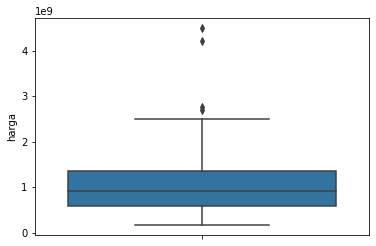

In [ ]:
p = sns.boxplot(y="harga", data=dfX2)

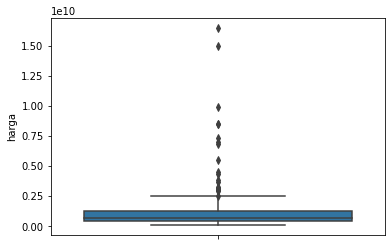

In [ ]:
p = sns.boxplot(y="harga", data=dfB2)

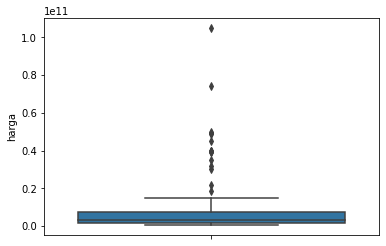

In [ ]:
p = sns.boxplot(y="harga", data=dfJ2)

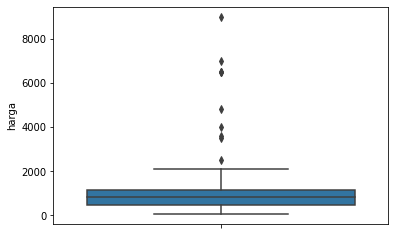

In [ ]:
p = sns.boxplot(y="harga", data=dfD2)

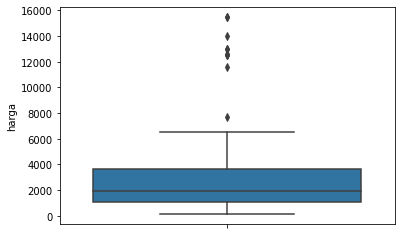

In [ ]:
p = sns.boxplot(y="harga", data=dfT2)

Secara sekilas dari boxplot yang kami miliki (yang kurang sempurna karena masih ada outlier dan kami kekurangan waktu), kami akan sekilas mengambil keterangan bahwa tangerang mungkin sebagai daerah dengan harga tertinggi dibandingkan dengan daerah-daerah lainnya.